## EDA OF SPECTRAL REFLECTANCE DATA of corn samples collected using hyperspectral imaging.

### **Dataset Overview**
The dataset provided contains **spectral reflectance data** of **corn samples** collected using **hyperspectral imaging**. The goal is to predict **DON concentration** (vomitoxin levels) in corn using machine learning.

---

### **Dataset Structure**
- **Rows (Samples)**: Each row represents a **single corn sample**.
- **Columns (Features)**:
  1. **"hsi_id"** (Column 1) → A unique identifier for each sample.
  2. **448 Spectral Reflectance Features** (Columns 2 to 449) →  
     - These columns contain **reflectance values** at different **wavelength bands**.
     - The values range between **0.26 and 0.95**.
  3. **"vomitoxin_ppb"** (Column 450) → **Target Variable**  
     - Represents the **DON concentration (in ppb)** for each sample.
     - Values range from **0 ppb** to **131,000 ppb**.

---

### **Understanding Spectral Reflectance Features**
- The **448 spectral features** correspond to reflectance values recorded at different **wavelength bands**.
- Reflectance is the proportion of **light reflected** by the corn sample at specific wavelengths.
- These features help detect chemical properties related to **DON contamination**.

---

### **Target Variable: DON Concentration (`vomitoxin_ppb`)**
- DON (**Deoxynivalenol**) is a **toxic mycotoxin** produced by fungi in corn.
- High DON levels indicate **contaminated corn**, which is dangerous for **human and animal consumption**.
- The task is to **predict DON concentration** based on spectral features.

---

- **Below Those Task are mentioned to be performed in EDA**
1. **import Libaries**
2. **Data Cleaning**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

In [3]:
#import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Conv1D,MaxPooling1D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
#from sklearn.model_selection import  RandomizedSearchCV
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout , Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
df = pd.read_csv('TASK-ML-INTERN.csv')
df.head(5)

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


- **Checking Missing Value**

In [7]:
df.isnull().sum()

hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64

In [8]:
missing_value = df.isnull().sum().sum()
missing_value

0

### MISSING VALUE RESULT
**ANS --> 0**

- **Summary Statistics of the spectral data**

In [9]:
Summary = df.iloc[:,1:].describe().T
Summary

,count,mean,std,min,25%,50%,75%,max
0,500.0,0.443118,0.044719,0.311182,0.410456,0.449105,0.480245,0.556287
1,500.0,0.440761,0.045520,0.295321,0.404310,0.442651,0.478822,0.530168
2,500.0,0.433814,0.045764,0.284064,0.397038,0.434215,0.473158,0.528774
3,500.0,0.426122,0.046070,0.282054,0.389029,0.425074,0.464947,0.533202
4,500.0,0.418990,0.045405,0.296702,0.382102,0.417075,0.459232,0.511909
...,...,...,...,...,...,...,...,...
444,500.0,0.738738,0.053601,0.571767,0.700638,0.743965,0.775686,0.945225
445,500.0,0.738298,0.054014,0.577803,0.698655,0.743301,0.775621,0.932812
446,500.0,0.737599,0.054136,0.576985,0.698107,0.745216,0.774635,0.931381
447,500.0,0.738099,0.054297,0.562302,0.699673,0.745733,0.774310,0.957860


- **CHECKING OUTLIER**

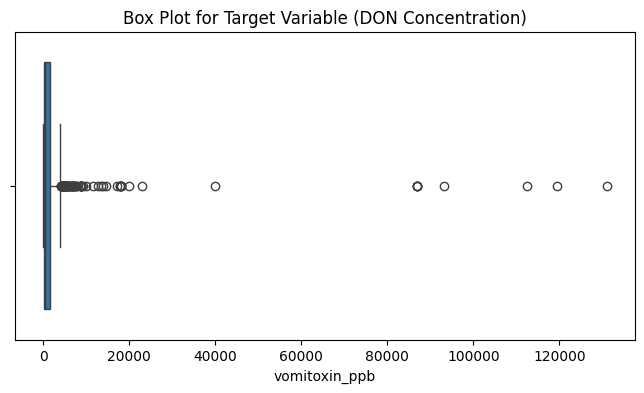

In [10]:
# Box plot to detect outliers in the target variable (vomitoxin_ppb)
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['vomitoxin_ppb'])
plt.title('Box Plot for Target Variable (DON Concentration)')
plt.show()


### Box Plot Analysis
- **The box plot shows outliers as points that are far from the whiskers.**
- **There are several high-value outliers in the DON concentration**

- **Now I'll apply the IQR method to detect and handle these outliers.**

In [11]:
# Detect outliers using the IQR method
Q1 = df['vomitoxin_ppb'].quantile(0.25)  # 25th percentile
Q3 = df['vomitoxin_ppb'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define outliers as data points outside 1.5 * IQR range
outliers = (df['vomitoxin_ppb'] < (Q1 - 1.5 * IQR)) | (df['vomitoxin_ppb'] > (Q3 + 1.5 * IQR))
outliers.sum()


80

### *IQR Method Result*
**80 outliers detected in the target variable (vomitoxin_ppb) based on the IQR method.**


- **Handling Cap/Floor Values – Set outliers to the highest/lowest non-outlier value.**

In [12]:
# Cap and floor the outliers to the IQR range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply capping and flooring
df['vomitoxin_ppb'] = df['vomitoxin_ppb'].clip(lower=lower_bound, upper=upper_bound)

# Verify outliers after capping
outliers_after_capping = ((df['vomitoxin_ppb'] < lower_bound) | (df['vomitoxin_ppb'] > upper_bound)).sum()
outliers_after_capping

0

## Now Again Visualise boxplot after remove all outlier

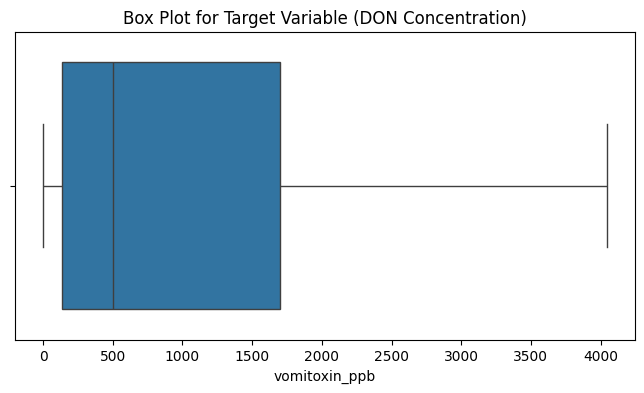

In [13]:
# Box plot to detect outliers in the target variable (vomitoxin_ppb)
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['vomitoxin_ppb'])
plt.title('Box Plot for Target Variable (DON Concentration)')
plt.show()

- **Apply normalization or standardization to the spectral data**

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Extract spectral features (excluding hsi_id and target variable)
X = df.iloc[:, 1:-1]

# Apply Standardization (Zero Mean, Unit Variance)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply Min-Max Normalization (Scale between 0 and 1)
min_max_scaler = MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X)

# Convert back to DataFrame for visualization
df_standardized = pd.DataFrame(X_standardized, columns=X.columns)
df_normalized = pd.DataFrame(X_normalized, columns=X.columns)

# Compute the average spectral reflectance before and after scaling
mean_original = X.mean(axis=0)
mean_standardized = df_standardized.mean(axis=0)
mean_normalized = df_normalized.mean(axis=0)



In [15]:
df_standardized

,0,1,2,3,4,5,6,7,8,9,...,438,439,440,441,442,443,444,445,446,447
0,-0.602959,-0.965751,-0.543093,-1.157165,-0.742877,-1.052805,-1.138474,-1.291257,-1.128080,-0.647413,...,-1.136301,-0.579796,-0.435043,-0.472136,-0.641236,-0.807712,-0.858033,-0.499055,-0.738140,-0.619071
1,-0.611562,-0.831331,-0.683547,-0.654183,-0.480564,-0.510221,-0.678841,-0.826155,-0.462121,-0.691024,...,-0.754022,-1.071488,-0.811826,-0.715506,-0.814737,-0.726845,-1.145151,-0.766827,-0.759125,-0.904192
2,-1.210868,-1.529537,-1.328061,-1.135296,-1.277202,-1.403752,-1.618288,-1.577331,-1.492895,-1.516409,...,-1.311275,-1.089395,-1.333533,-1.437541,-1.186149,-1.183869,-1.546059,-1.470599,-1.231647,-1.344393
3,0.575693,0.714559,0.637270,0.721659,0.940964,1.060639,1.176304,0.638522,0.488863,0.540156,...,-0.256030,0.028574,-0.186753,-0.068313,-0.181179,0.216860,-0.004504,0.076859,0.315411,-0.085268
4,0.900614,1.022832,0.772988,1.336847,0.992857,0.866564,1.177082,0.936845,0.737234,0.940551,...,0.677745,0.542282,0.600180,0.390096,0.442627,0.423396,0.098487,0.689182,0.422178,0.256052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.783938,0.071957,0.181683,0.246627,0.213439,0.018041,0.267283,0.470473,0.441400,0.305277,...,-0.016046,0.123585,-0.191706,-0.436956,-0.008592,-0.281142,-0.340894,0.043130,0.046548,-0.299783
496,-0.755495,-1.007581,-1.171925,-1.103399,-1.606453,-1.293157,-1.004847,-1.299862,-0.960701,-1.431361,...,-1.848498,-1.329392,-1.524444,-1.467160,-1.517093,-1.789060,-1.722953,-1.510748,-1.680774,-1.684417
497,0.971661,1.332856,1.451540,1.782074,1.552487,1.004400,1.269080,1.443253,1.114482,1.107576,...,0.783383,0.866190,0.736917,0.519024,0.590407,0.581464,0.424406,0.593323,0.475675,1.089327
498,0.480749,1.276771,1.208778,0.592281,1.513373,1.108214,1.254474,1.087312,1.327835,0.864912,...,0.115535,-0.034126,0.352402,0.216864,0.413197,0.397900,-0.155133,0.282563,0.222267,0.337065


In [16]:
df_normalized

,0,1,2,3,4,5,6,7,8,9,...,438,439,440,441,442,443,444,445,446,447
0,0.428384,0.432294,0.510485,0.361585,0.411656,0.365379,0.382911,0.305546,0.382076,0.475299,...,0.293004,0.390543,0.372789,0.411477,0.372650,0.330556,0.324067,0.376234,0.340562,0.359537
1,0.426816,0.458322,0.484244,0.453758,0.466945,0.478181,0.467686,0.401405,0.506341,0.466313,...,0.349883,0.321045,0.315913,0.377114,0.346713,0.342318,0.282899,0.335534,0.337359,0.320439
2,0.317584,0.323124,0.363833,0.365593,0.299035,0.292418,0.294413,0.246585,0.314003,0.296242,...,0.266969,0.318514,0.237159,0.275166,0.291190,0.275842,0.225416,0.228563,0.265252,0.260075
3,0.643212,0.757663,0.731006,0.705884,0.766564,0.804758,0.809852,0.703279,0.683790,0.719998,...,0.423980,0.476533,0.410269,0.468494,0.441426,0.479585,0.446448,0.463770,0.501336,0.432737
4,0.702433,0.817355,0.756362,0.818619,0.777502,0.764411,0.809995,0.764764,0.730135,0.802499,...,0.562916,0.549142,0.529060,0.533219,0.534680,0.509626,0.461215,0.556841,0.517629,0.479541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.681167,0.633232,0.645891,0.618834,0.613222,0.588005,0.642191,0.668643,0.674934,0.671601,...,0.459687,0.489962,0.409522,0.416444,0.467226,0.407148,0.398216,0.458644,0.460307,0.403321
496,0.400582,0.424194,0.393003,0.371438,0.229638,0.315411,0.407557,0.303772,0.413308,0.313766,...,0.187036,0.284592,0.208341,0.270984,0.241716,0.187814,0.200053,0.222461,0.196714,0.213448
497,0.715383,0.877387,0.883133,0.900208,0.895456,0.793066,0.826963,0.869136,0.800528,0.836915,...,0.578634,0.594925,0.549700,0.551423,0.556772,0.532618,0.507946,0.542271,0.525792,0.593807
498,0.625907,0.866527,0.837779,0.682176,0.887212,0.814649,0.824269,0.795776,0.840339,0.786914,...,0.479265,0.467671,0.491657,0.508760,0.530281,0.505918,0.424851,0.495036,0.487122,0.490651


In [17]:
mean_original

0      0.443118
1      0.440761
2      0.433814
3      0.426122
4      0.418990
         ...   
443    0.739850
444    0.738738
445    0.738298
446    0.737599
447    0.738099
Length: 448, dtype: float64

In [18]:
mean_standardized

0     -1.147527e-15
1     -1.945111e-15
2      7.549517e-16
3      1.158185e-15
4      1.950440e-15
           ...     
443    1.062261e-15
444   -1.231015e-15
445   -1.062261e-15
446   -5.169198e-16
447   -1.397993e-15
Length: 448, dtype: float64

- **Plot the average spectral reflectance curves**

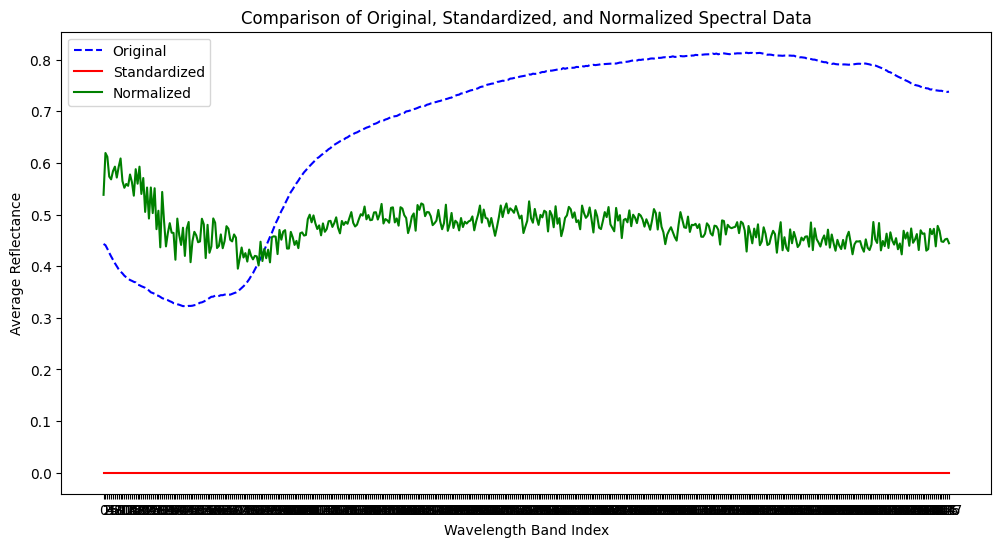

In [19]:
# Plot the average spectral reflectance curves
plt.figure(figsize=(12, 6))
plt.plot(mean_original, label="Original", color='blue', linestyle='dashed')
plt.plot(mean_standardized, label="Standardized", color='red')
plt.plot(mean_normalized, label="Normalized", color='green')
plt.xlabel("Wavelength Band Index")
plt.ylabel("Average Reflectance")
plt.title("Comparison of Original, Standardized, and Normalized Spectral Data")
plt.legend()
plt.show()

- **spectral reflectance curves for random corn samples across multiple wavelength bands.**

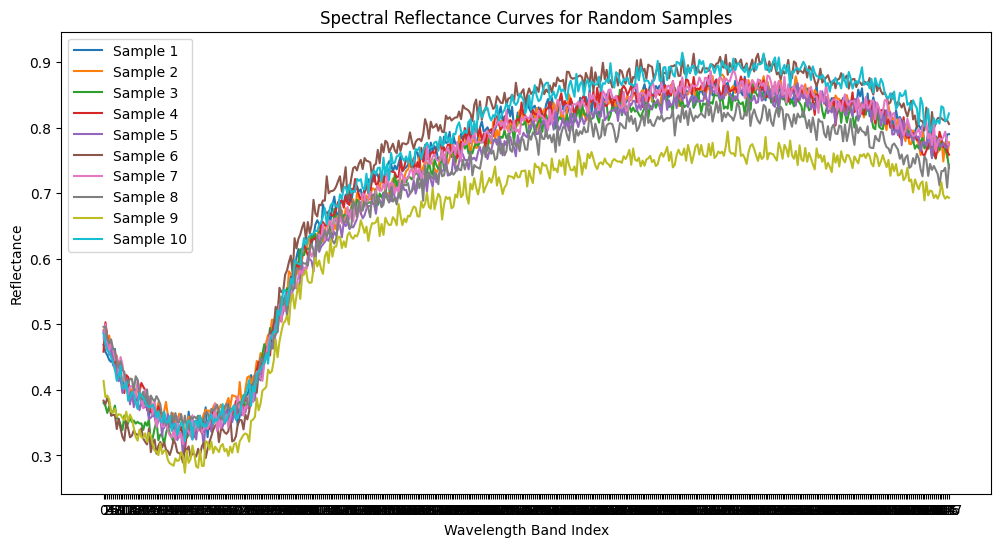

In [20]:
# Select a random subset of samples for visualization
np.random.seed(42)
sample_indices = np.random.choice(df.index, size=10, replace=False)
subset = df.iloc[sample_indices, 1:-1].T  # Transpose for plotting

# Plot spectral reflectance curves for selected samples
plt.figure(figsize=(12, 6))
for i, sample in enumerate(subset.columns):
    plt.plot(subset.index, subset[sample], label=f'Sample {i+1}')

plt.xlabel("Wavelength Band Index")
plt.ylabel("Reflectance")
plt.title("Spectral Reflectance Curves for Random Samples")
plt.legend()
plt.show()


### **The curves indicate variation in reflectance values, which may be useful for distinguishing samples with different DON concentrations.**

###  Heatmap to visualize the spectral reflectance values

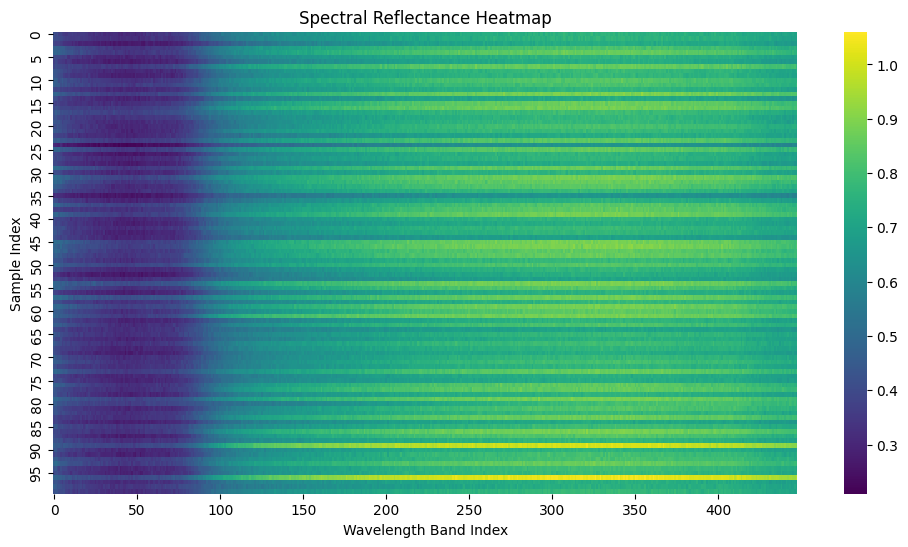

In [21]:
subset = df.iloc[:100, 1:-1]  # Excluding 'hsi_id' and target variable

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(subset, cmap="viridis", xticklabels=50, yticklabels=5)

# Add labels and title
plt.xlabel("Wavelength Band Index")
plt.ylabel("Sample Index")
plt.title("Spectral Reflectance Heatmap")

# Show the plot
plt.show()

- ### **dimensionality reduction using PCA**

In [7]:
from sklearn.decomposition import PCA

# Extract spectral features (excluding the hsi_id and target variable)
X = df.iloc[:, 1:-1]

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_



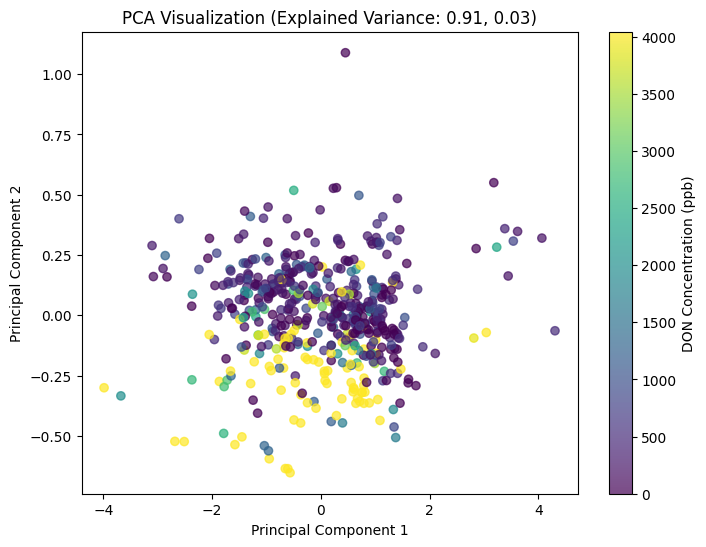

In [8]:
# Scatter plot of PCA-transformed data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["vomitoxin_ppb"], cmap="viridis", alpha=0.7)
plt.colorbar(scatter, label="DON Concentration (ppb)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"PCA Visualization (Explained Variance: {explained_variance[0]:.2f}, {explained_variance[1]:.2f})")
plt.show()


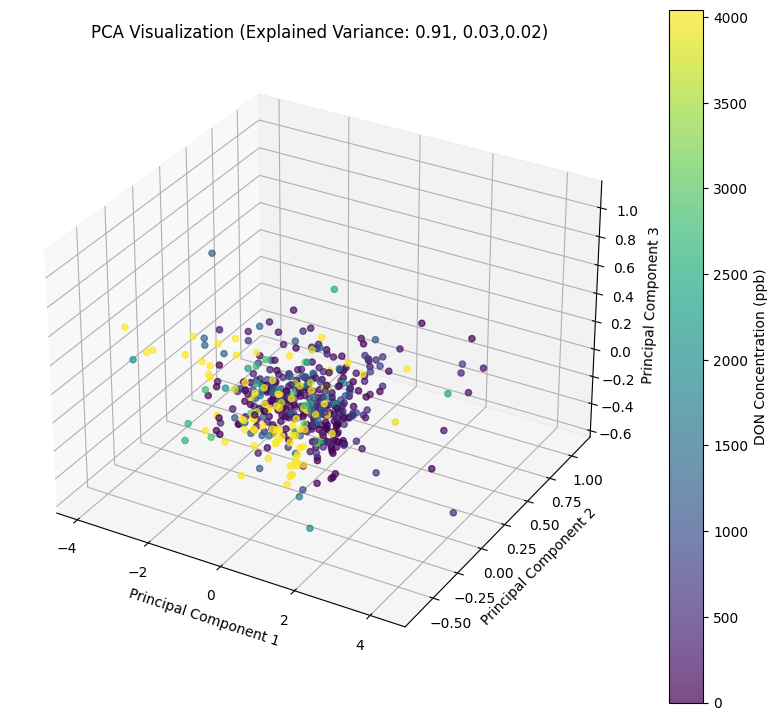

In [ ]:
from sklearn.decomposition import PCA

# Extract spectral features (excluding the hsi_id and target variable)
X = df.iloc[:, 1:-1]

# Apply PCA to reduce to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
# Scatter plot of PCA-transformed data
fig = plt.figure(figsize=(10,9))
ax = fig.add_subplot(111,projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1],X_pca[:, 2], c=df["vomitoxin_ppb"], cmap="viridis", alpha=0.7)
plt.colorbar(scatter, label="DON Concentration (ppb)")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title(f"PCA Visualization (Explained Variance: {explained_variance[0]:.2f}, {explained_variance[1]:.2f},{explained_variance[2]:.2f})")
plt.show()



- **Training and Testing our dataset**

In [10]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.iloc[:, 1:-1]
y = df["vomitoxin_ppb"]

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((400, 448), (100, 448), (400,), (100,))

### **creating a model by using Randomforest Regressor Algorithm** 

In [14]:
class RandomForestModel:
    def __init__(self):
        self.model = None
        self.best_params = None
    
    def train_with_tuning(self, X_train, y_train):
        # Define hyperparameter grid
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2']
        }
        
        # Initialize the model
        rf = RandomForestRegressor(random_state=42)

        # Perform Random Search with 5-fold cross-validation
        random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                           n_iter=10, cv=5, n_jobs=-1, scoring='neg_mean_squared_error',
                                           random_state=42)
        random_search.fit(X_train, y_train)

        # Best parameters
        self.best_params = random_search.best_params_
        print("Best Parameters:", self.best_params)

        # Train the model with best parameters
        self.model = RandomForestRegressor(**self.best_params, random_state=42)
        self.model.fit(X_train, y_train)

    def evaluate(self, X_test, y_test):
        y_pred = self.model.predict(X_test)
        self.pred_y = y_pred
        # Calculate metrics
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")
        return mae, rmse, r2
     # Scatter plot for actual vs predicted values
    def Scater_plot(self,y_test):
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test,self.pred_y, alpha=0.7, color="blue", edgecolors="k")
        plt.plot([0, max(y_test)], [0, max(y_test)], linestyle="--", color="red")  # Ideal prediction line
        plt.xlabel("Actual DON Concentration (ppb)")
        plt.ylabel("Predicted DON Concentration (ppb)")
        plt.title("Actual vs. Predicted DON Concentration")
        plt.show()

Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30}
MAE: 808.48, RMSE: 1059.98, R²: 0.43


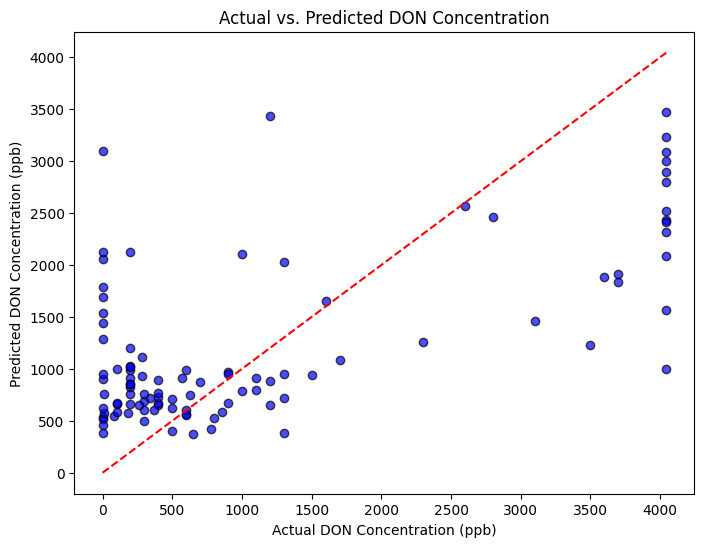

In [17]:
# Split the data
X = df.iloc[:, 1:-1]
y = df["vomitoxin_ppb"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
rf_model = RandomForestModel()
rf_model.train_with_tuning(X_train, y_train)

# Evaluate the model
mae, rmse, r2 = rf_model.evaluate(X_test, y_test)
mae, rmse, r2
rf_model.Scater_plot(y_test)

- ### **Build a model by using FCNN(Fully Connected Neural Network) algorithom with hyperparameter by Random Search**

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'neurons': 64, 'learning_rate': 0.01, 'layers': 5, 'epochs': 50, 'dropout_rate': 0.3, 'batch_size': 32, 'activation': 'relu'}
MAE: 683.48, RMSE: 1004.29, R²: 0.49, Loss: 1008591.75


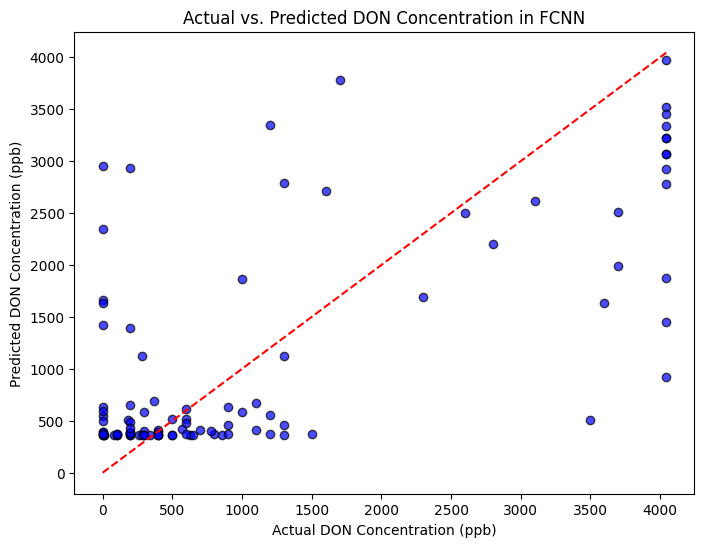

In [12]:
class FCNNModel:
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build_model(self, layers=2, neurons=128, activation='relu', dropout_rate=0.3, learning_rate=0.001):
        model = Sequential()
        model.add(Dense(neurons, activation=activation, input_shape=(self.input_shape,)))
        for _ in range(layers - 1):
            model.add(Dense(neurons, activation=activation))
            model.add(Dropout(dropout_rate))
        model.add(Dense(1))  # Output layer for regression
        model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
        return model

    def train_with_tuning(self, X_train, y_train):
        model = KerasRegressor(build_fn=self.build_model, verbose=0)

        param_dist = {
            'layers': [5,7,9],
            'neurons': [64, 128, 256],
            'activation': ['relu', 'tanh', 'sigmoid'],
            'dropout_rate': [0.2, 0.3, 0.5],
            'learning_rate': [0.01, 0.001, 0.0001],
            'batch_size': [16, 32, 64],
            'epochs': [50, 100, 150] 
        }

        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                           n_iter=10, cv=3, verbose=1, n_jobs=-1)

        random_search.fit(X_train, y_train)
        self.best_model = random_search.best_estimator_
        self.best_params = random_search.best_params_
        return self.best_params

    def predict(self, X_test):
        return self.best_model.predict(X_test)

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        self.pred_y = y_pred
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        loss = self.best_model.model.evaluate(X_test, y_test, verbose=0)
        return mae, rmse, r2, loss
    def Scater_plot(self,y_test):
            
    # Scatter plot of actual vs predicted values
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test,self.pred_y, alpha=0.7, color="blue", edgecolors="k")
        plt.plot([0, max(y_test)], [0, max(y_test)], linestyle="--", color="red")  # Ideal prediction line
        plt.xlabel("Actual DON Concentration (ppb)")
        plt.ylabel("Predicted DON Concentration (ppb)")
        plt.title("Actual vs. Predicted DON Concentration in FCNN")
        plt.show()

# Example usage
# Define features and target variable
X = df.iloc[:, 1:-1]
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
y = df["vomitoxin_ppb"]

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape
fcnn = FCNNModel(input_shape=X_train.shape[1])
best_params = fcnn.train_with_tuning(X_train, y_train)
print("Best Hyperparameters:", best_params)

mae, rmse, r2, loss = fcnn.evaluate(X_test, y_test)
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}, Loss: {loss:.2f}")
fcnn.Scater_plot(y_test)

- ### **Build a model by using CNN(Convoluton Neural Network) using conv2D with hyperparameter tunning by Random Search**

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'learning_rate': 0.01, 'kernel_size': (3, 3), 'filters2': 128, 'filters1': 32, 'epochs': 150, 'dropout_rate': 0.2, 'dense_units': 64, 'batch_size': 32, 'activation': 'relu'}
MAE: 803.63, RMSE: 1088.68, R²: 0.40, Loss: 1185222.25


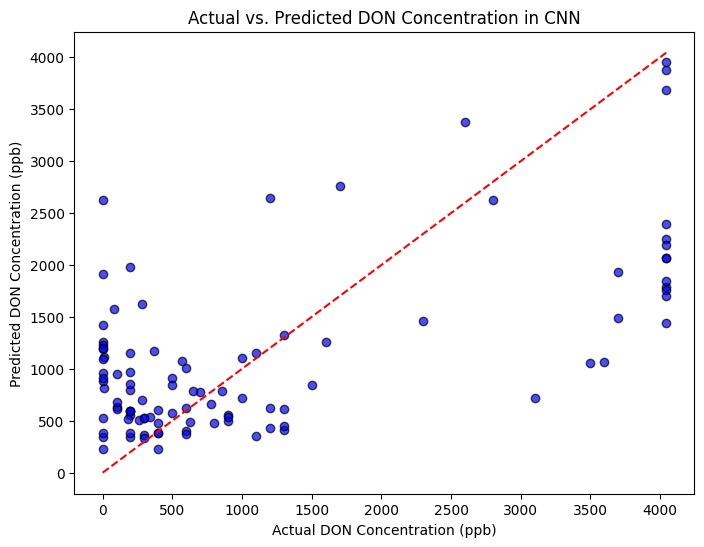

In [ ]:


class CNNModel:
    def __init__(self, input_shape):
        self.input_shape = input_shape
        self.best_model = None
        self.best_params = None

    def build_model(self, filters1=32, filters2=64, kernel_size=(3,3), activation='relu', 
                    dropout_rate=0.3, learning_rate=0.001, dense_units=64):
        model = Sequential()
        model.add(Conv2D(filters=filters1, kernel_size=kernel_size, activation=activation, input_shape=self.input_shape))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Conv2D(filters=filters2, kernel_size=kernel_size, activation=activation))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Flatten())
        model.add(Dense(dense_units, activation=activation))
        model.add(Dropout(dropout_rate))
        model.add(Dense(int(dense_units / 2), activation=activation))
        model.add(Dense(1))  # Output layer for regression
        model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
        return model

    def train_with_tuning(self, X_train, y_train):
        model = KerasRegressor(build_fn=self.build_model, verbose=0)

        param_dist = {
            'filters1': [16, 32, 64],
            'filters2': [32, 64, 128],
            'kernel_size': [(3, 3), (5, 5)],
            'activation': ['relu', 'tanh'],
            'dropout_rate': [0.2, 0.3, 0.4],
            'learning_rate': [0.01, 0.001, 0.0001],
            'dense_units': [32, 64, 128],
            'batch_size': [16, 32, 64],
            'epochs': [50, 100, 150] 
        }

        # Perform Random Search with cross-validation
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                           n_iter=10, cv=3, verbose=1, n_jobs=-1)
        
        random_search.fit(X_train, y_train)
        self.best_model = random_search.best_estimator_
        self.best_params = random_search.best_params_
        print("Best Hyperparameters:", self.best_params)

    def predict(self, X_test):
        return self.best_model.predict(X_test)

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        self.pred_y = y_pred
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        loss = self.best_model.model.evaluate(X_test, y_test, verbose=0)
        return mae, rmse, r2, loss
    def Scater_plot(self,y_test):
            
    # Scatter plot of actual vs predicted values
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test,self.pred_y, alpha=0.7, color="blue", edgecolors="k")
        plt.plot([0, max(y_test)], [0, max(y_test)], linestyle="--", color="red")  # Ideal prediction line
        plt.xlabel("Actual DON Concentration (ppb)")
        plt.ylabel("Predicted DON Concentration (ppb)")
        plt.title("Actual vs. Predicted DON Concentration in CNN")
        plt.show()

# Reshape data for CNN input (samples, height, width, channels)
X = df.iloc[:, 1:-1].values  # Spectral data (448 bands)
y = df.iloc[:, -1].values    # Target variable (DON concentration)
X = X.reshape(X.shape[0], 28, 16, 1)  # Example: reshape 448 bands into (28, 16)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train CNN model with tuning
cnn = CNNModel(input_shape=(28, 16, 1))
cnn.train_with_tuning(X_train, y_train)

# Evaluate model performance
mae, rmse, r2, loss = cnn.evaluate(X_test, y_test)
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}, Loss: {loss:.2f}")
cnn.Scater_plot(y_test)


- ### **Build a model by using CNN(Convoluton Neural Network) using conv1D with hyperparameter tunning by Random Search**

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'learning_rate': 0.01, 'kernel_size': 3, 'filters2': 64, 'filters1': 64, 'epochs': 150, 'dropout_rate': 0.3, 'dense_units': 64, 'batch_size': 64, 'activation': 'relu'}
MAE: 879.82, RMSE: 1104.67, R²: 0.38, Loss: 1220300.12


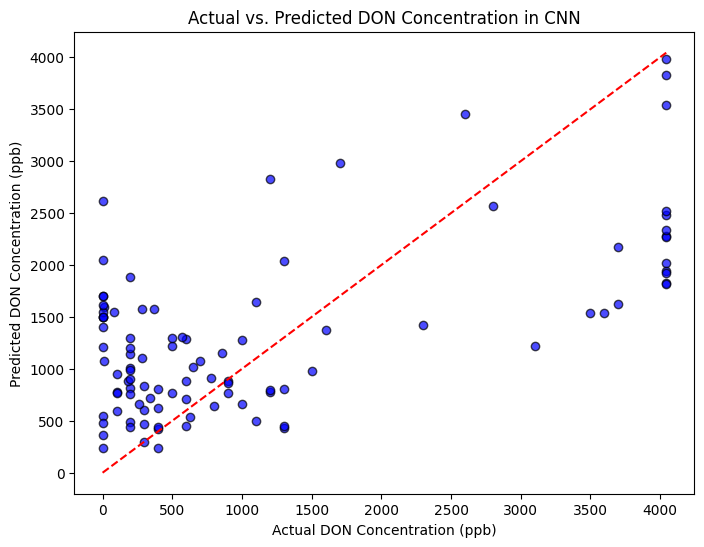

In [31]:
class CNNModel:
    def __init__(self, input_shape):
        self.input_shape = input_shape
        self.best_model = None
        self.best_params = None

    def build_model(self, filters1=32, filters2=64, kernel_size=3, activation='relu', 
                    dropout_rate=0.3, learning_rate=0.001, dense_units=64):
        model = Sequential()
        model.add(Conv1D(filters=filters1, kernel_size=kernel_size, activation=activation, 
                         input_shape=self.input_shape))
        model.add(MaxPooling1D(pool_size=2))  
        model.add(Conv1D(filters=filters2, kernel_size=kernel_size, activation=activation))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Flatten())
        model.add(Dense(dense_units, activation=activation))
        model.add(Dropout(dropout_rate))
        model.add(Dense(int(dense_units / 2), activation=activation))
        model.add(Dense(1))  # Output layer for regression
        
        model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
        return model

    def train_with_tuning(self, X_train, y_train):
        model = KerasRegressor(build_fn=self.build_model, verbose=0)

        param_dist = {
            'filters1': [16, 32, 64],
            'filters2': [32, 64, 128],
            'kernel_size': [3, 5],  # Conv1D kernel size is a single integer
            'activation': ['relu', 'tanh'],
            'dropout_rate': [0.2, 0.3, 0.4],
            'learning_rate': [0.01, 0.001, 0.0001],
            'dense_units': [32, 64, 128],
            'batch_size': [16, 32, 64],
            'epochs': [50, 100, 150] 
        }

        # Perform Random Search with cross-validation
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                           n_iter=10, cv=3, verbose=1, n_jobs=-1)
        
        random_search.fit(X_train, y_train)
        self.best_model = random_search.best_estimator_
        self.best_params = random_search.best_params_
        print("Best Hyperparameters:", self.best_params)

    def predict(self, X_test):
        return self.best_model.predict(X_test)

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        self.pred_y = y_pred
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        loss = self.best_model.model.evaluate(X_test, y_test, verbose=0)
        return mae, rmse, r2, loss

    def Scater_plot(self, y_test):
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, self.pred_y, alpha=0.7, color="blue", edgecolors="k")
        plt.plot([0, max(y_test)], [0, max(y_test)], linestyle="--", color="red")  # Ideal prediction line
        plt.xlabel("Actual DON Concentration (ppb)")
        plt.ylabel("Predicted DON Concentration (ppb)")
        plt.title("Actual vs. Predicted DON Concentration in CNN")
        plt.show()

# ===============================
# Load and reshape data for CNN
# x_pca = pd.DataFrame(X_pca, columns=['pc1','pc2','pc3'])
# X = x_pca.values  # Spectral data (3 bands)
X = df.iloc[:,1:-1].values
y = df.iloc[:, -1].values  # Target variable (DON concentration)
X = X.reshape(X.shape[0],28,16)  # Reshape to (samples, features, channels)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train CNN model with tuning
cnn = CNNModel(input_shape=(28,16))
cnn.train_with_tuning(X_train, y_train)

# Evaluate model performance
mae, rmse, r2, loss = cnn.evaluate(X_test, y_test)
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}, Loss: {loss:.2f}")

# Scatter plot
cnn.Scater_plot(y_test)


- ### **Build a model of LSTM with hyperparameter tunning by Random Search**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#  Class for LSTM Model
class LSTMModel:
    def __init__(self, input_shape):
        self.input_shape = input_shape
        self.best_model = None
        self.best_params = None

    #  Method to build the LSTM model
    def build_model(self, units=50, activation='tanh', dropout_rate=0.2, learning_rate=0.001):
        model = Sequential()
        model.add(LSTM(units=units, activation=activation, input_shape=self.input_shape, return_sequences=True))
        model.add(Dropout(dropout_rate))
        model.add(LSTM(units=units // 2, activation=activation))
        model.add(Dropout(dropout_rate))
        model.add(Dense(1))  # Output layer for regression
        
        # Compile the model
        model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
        return model
    
    #  Method to train the model with hyperparameter tuning using Random Search
    def train_with_tuning(self, X_train, y_train):
        model = KerasRegressor(build_fn=self.build_model, verbose=0)

        # Define hyperparameter search space
        param_dist = {
            'units': [32, 64, 128],
            'activation': ['tanh', 'relu'],
            'dropout_rate': [0.2, 0.3, 0.4],
            'learning_rate': [0.001, 0.0001, 0.01],
            'batch_size': [16, 32, 64],
            'epochs': [50, 100, 150] 
        }

        # Use RandomizedSearchCV for tuning
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                           n_iter=10, cv=3, verbose=1, n_jobs=-1)
        random_search.fit(X_train, y_train)

        # Save the best model and hyperparameters
        self.best_model = random_search.best_estimator_
        self.best_params = random_search.best_params_
        print("\nBest Parameters:", self.best_params)

    #  Method to predict on test set
    def predict(self, X_test):
        return self.best_model.predict(X_test)

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        self.pred_y = y_pred
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        loss = self.best_model.model.evaluate(X_test, y_test, verbose=0)
        return mae, rmse, r2, loss
    def Scater_plot(self,y_test):
                
    # Scatter plot of actual vs predicted values
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test,self.pred_y, alpha=0.7, color="blue", edgecolors="k")
        plt.plot([0, max(y_test)], [0, max(y_test)], linestyle="--", color="red")  # Ideal prediction line
        plt.xlabel("Actual DON Concentration (ppb)")
        plt.ylabel("Predicted DON Concentration (ppb)")
        plt.title("Actual vs. Predicted DON Concentration in CNN")
        plt.show()



Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best Parameters: {'units': 128, 'learning_rate': 0.01, 'epochs': 150, 'dropout_rate': 0.4, 'batch_size': 64, 'activation': 'relu'}

Model Performance:
MAE: 745.6035
RMSE: 1069.6852
R² Score: 0.4171
Loss: 1144226.5000


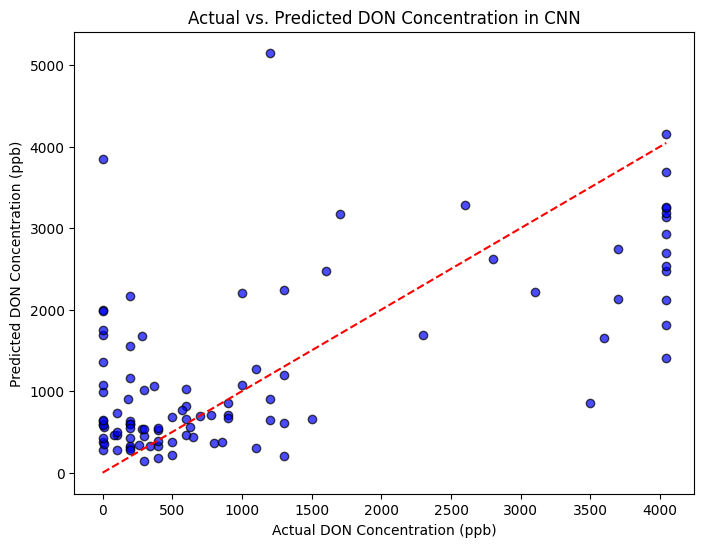

In [ ]:
# Extract spectral features and target variable
x_pca = pd.DataFrame(X_pca , columns=['pc1','pc2','pc3'])
X = x_pca.values  # Spectral data (3 bands)
y = df['vomitoxin_ppb']    # Target variable (DON concentration)

# Reshape data for LSTM input (samples, time_steps, features)
X = X.reshape(X.shape[0], 1,3)  # Example: reshape 3 bands into (1,3)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the LSTM model with hyperparameter tuning
lstm = LSTMModel(input_shape=(X_train.shape[1], X_train.shape[2]))
lstm.train_with_tuning(X_train, y_train)

# Evaluate model performance
mae, rmse, r2, loss = lstm.evaluate(X_test, y_test)

print(f"\nModel Performance:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Loss: {loss:.4f}")
lstm.Scater_plot(y_test)